<div style="background-color:#009440; padding: 0px; background-size:cover; background-opacity:50%; border-radius:5px; height:300px">
    <div style="margin: 5px; padding: 10px;">
    <h1 style="color:#00000">Geophysical Data Acquisition and Analysis</h1>
    <h4 style="color:rgba(0,0,0,0.6)">Sebastian Anger, Tobias, Megies, Taufiqurrrahman, Alice Gabriel</h4>
    </div>
    <div style="float:right; margin: 20px; padding: 20px; background:rgba(255,255,255,0.7); width: 70%; height: 100px">
      <div style="position:relative; top:40%; transform: translateY(-50%)">
        <div style="font-size: x-large; font-weight:900; color:rgba(0,0,0,0.8); line-height:100%">Fourier Series & Transformation</div>
        </div>
    </div>
</div>

**Again, please execute the following cell first!**

In [31]:
# Cell 0 - Preparation: load packages, set some basic options  
%matplotlib inline
from __future__ import print_function
from scipy import signal
from obspy.signal.invsim import cosine_taper 
from matplotlib import rcParams
import numpy as np
import warnings
warnings.filterwarnings('ignore')                  # do not show warnings
import matplotlib.pylab as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15, 3

### Exercise 1: The Fourier series and its coefficients 

In the following two code cells, we first define a function which calculates the coefficients of the Fourier series for a given function. The function in the next cell does it the other way round: it is creating a function based on given coefficients and weighting factors.

In [32]:
# Cell 1: code by Giulio Ghirardo  
def fourier_series_coeff(f, T, N):
    """Calculates the first 2*N+1 Fourier series coeff. of a periodic function.

    Given a periodic, function f(t) with period T, this function returns the
    coefficients a0, {a1,a2,...},{b1,b2,...} such that:

    f(t) ~= a0/2+ sum_{k=1}^{N} ( a_k*cos(2*pi*k*t/T) + b_k*sin(2*pi*k*t/T) )
    
    Parameters
    ----------
    f : the periodic function, a callable like f(t)
    T : the period of the function f, so that f(0)==f(T)
    N_max : the function will return the first N_max + 1 Fourier coeff.

    Returns
    -------
    a0 : float
    a,b : numpy float arrays describing respectively the cosine and sine coeff.
    """
    # From Nyquist theorem we must use a sampling 
    # freq. larger than the maximum frequency you want to catch in the signal. 
    f_sample = 2 * N
    
    # We also need to use an integer sampling frequency, or the
    # points will not be equispaced between 0 and 1. We then add +2 to f_sample.
    t, dt = np.linspace(0, T, f_sample + 2, endpoint=False, retstep=True)
    y = np.fft.rfft(f) / t.size
    y *= 2
    return y[0].real, y[1:-1].real[0:N], -y[1:-1].imag[0:N]

In [33]:
# Cell 2: code by Giulio Ghirardo  
def series_real_coeff(a0, a, b, t, T):
    """calculates the Fourier series with period T at times t,
       from the real coeff. a0,a,b"""
    tmp = np.ones_like(t) * a0 / 2.
    for k, (ak, bk) in enumerate(zip(a, b)):
        tmp += ak * np.cos(2 * np.pi * (k + 1) * t / T) + bk * np.sin(
            2 * np.pi * (k + 1) * t / T)
    return tmp

---  
Now, we can create an arbitrary function, which we use to experiment with in the following example.   
1) When you re-run cell 3 several times, do you always see the same function? Why? What does it tell you about the Fourier series?  

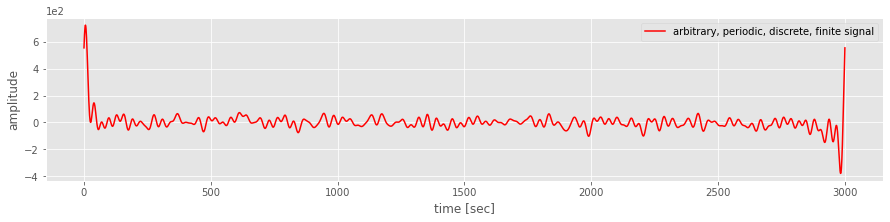

In [34]:
# Cell 3: create periodic, discrete, finite signal

# number of samples (intial value: 3000)
samp = 3000
# sample rate (initial value: 1)
dt = 1
# period
T = 1.0 / dt
length = samp * dt
# number of coefficients (initial value: 100)
N = 100
# weighting factors for coefficients (selected randomly)
a = np.random.randint(1, high=11, size=N)
b = np.random.randint(1, high=11, size=N)

t = np.linspace(0, length, samp)             # time axis
sig = series_real_coeff(a0, a, b, t, T)

# plotting
plt.plot(t, sig, 'r', label='arbitrary, periodic, discrete, finite signal')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.legend()
plt.show()

---  
Now, we can play with the signal and see what happens when we try to reconstruct it with a limited number of coefficients.  
2) Run the cells 4 and 5. What do you observe?  
3) Increase the number of coefficients $n$ step by step and re-run cells 4 and 5. What do you observe now? Can you explain?   
4) In cell 5 uncomment the lines to make a plot which is not normalized (and comment the other two) and re-run the cell. What do you see now and can you explain it?

In [37]:
# Cell 4: determine the first 'n' coefficients of the function using the code function of cell 1
T = 1        # period
n = 50        # number of coeffs to reconstruct
a0, a, b = fourier_series_coeff(sig, T, n)
a_ = a.astype(int)
b_ = b.astype(int)
print('coefficient a0 = ', int(a0))
print('array coefficients ak =', a_)
print('array coefficients bk =', b_)

coefficient a0 =  10
array coefficients ak = [ 40  40  70 100 246 159 100  42 220 278  72 192 277 160 306 308 128 248
 251 309 219 189 306 280 221 217 104 191 245  45 309  72  48 311 192 105
  39  48 229 188 250 139 314 102 109 200 160 280  51 114]
array coefficients bk = [235 147  59 148  30 265 119 120 265 264 236 293 115  88  28 263  30 118
 235 262 174 117  86 292 291 144 265 202  84 238 200 207 237 198 261 290
  29 179 286  23 143 293 282 173 261 283  79 165 292 256]


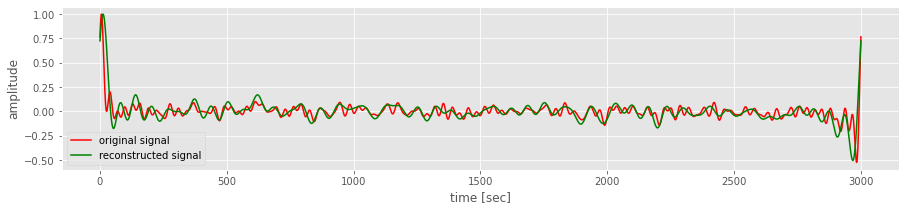

In [38]:
# Cell 5: reconstruct the function using the code in cell 2
g = series_real_coeff(a0, a, b, t, dt)

# plotting
#plt.plot(t, sig, 'r', label='original signal')          # NOT normalized 
#plt.plot(t, g, 'g', label='reconstructed signal')
plt.plot(t, sig/max(sig), 'r', label='original signal')  # normalized 
plt.plot(t, g/max(g), 'g', label='reconstructed signal')

plt.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.legend()
plt.show()

---

### Exercise 2: Fourier series, convergence and Gibb's phenomenon

As seen above the convergence of the *Fourier series* can be tricky. To analyse this effect in a bit more detail, we define a square wave in cell 6 and try to reconstruct it in cell 7.  
5) First, we use only 5 coefficients to reconstruct the wave. Describe what you see.  
6) Increase the number of coefficients $n$ in cell 7 step by step and re-run the cell.  What do you see now? Can you explain it?

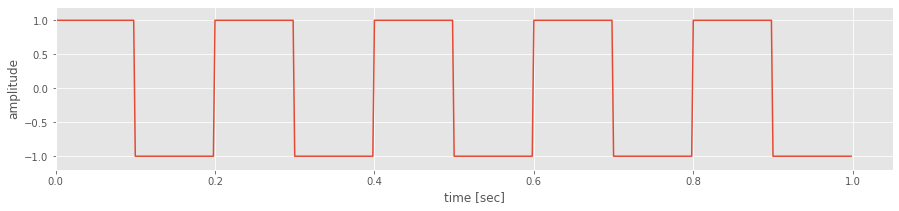

In [39]:
# Cell 6: define a square wave of 5 Hz
freq = 5.
npts = 500
dt_ = 0.002
length = npts * dt_
t_ = np.linspace(0, length, npts, endpoint=False)
square = signal.square(2 * np.pi * freq * t_)

plt.plot(t_, square)
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.xlim(0, 1.05)
plt.ylim(-1.2, 1.2)
plt.show()

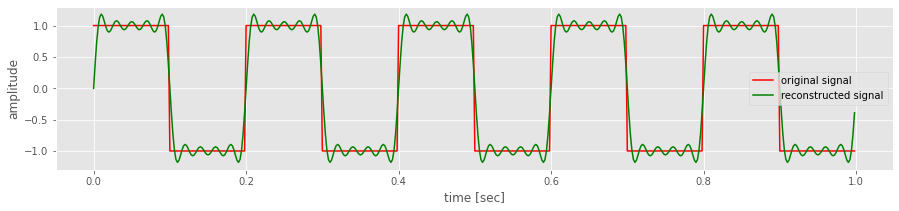

In [40]:
# Cell 7: reconstruct signal using convergence criterion
n = 10                 # number of coefficients (initial: 5)
T_ = 1/freq           # period of signal

# determine coefficients
a0 = 0
a = []
b = []
for i in range(1,n):
    if (i%2 != 0):
        a_ = 4/(np.pi*i)
    else:
        a_ = 0
    a.append(a_)
    b_ = (2*np.pi*i)/T_
    b.append(b_)

# reconstruct signal
g = np.ones_like(t_) * a0
for k, (ak, bk) in enumerate(zip(a, b)):
    g += ak * np.sin(bk*t_)

# plotting
plt.plot(t_, square, 'r', label='original signal')                  
plt.plot(t_, g, 'g', label='reconstructed signal')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
#plt.ylim(-1.1,1.1)
plt.legend()
plt.show()

---

### Exercise 3: Fourier transformation

Let us now do the Fourier transformation of the signal created in cell 3 and have a look on the amplitude spectra. In computer science the transformation is performed as fast Fourier transformation (FFT).    

7) How do you interpret the plot of the amplitude spectra?  
8) Which frequency contributes most to the final signal?   

samp = 3000  Need to be the same as in cell 3.
T = 1  Need to be the same as in cell 3.


Text(0, 0.5, 'Amplitude')

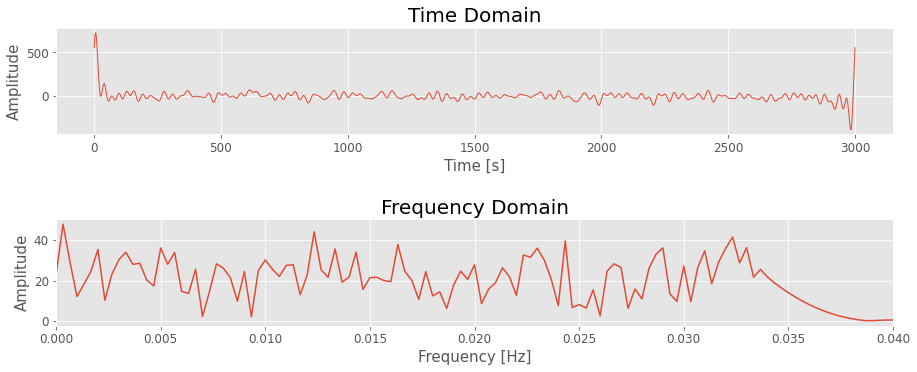

In [50]:
# Cell 8: FFT of signal
# number of sample points need to be the same as in cell 3
print('samp =',samp,' Need to be the same as in cell 3.')
# number of sample points need to be the same as in cell 3
print('T =',T,' Need to be the same as in cell 3.')
# percentage of taper applied to signal (initial: 0.1)
taper_percentage = 0.1
taper = cosine_taper(samp,taper_percentage)

sig_ = sig * taper
Fsig = np.fft.rfft(sig_, n=samp)

# prepare plotting
#xf = np.linspace(0.0, 1.0/(2.0*T), (samp/2)+1)
xf = np.linspace(0.0, 1.0/(2.0*T), int((samp/2)+1))
rcParams["figure.subplot.hspace"] = (0.8)
rcParams["figure.figsize"] = (15, 9)
rcParams["axes.labelsize"] = (15)
rcParams["axes.titlesize"] = (20)
rcParams["font.size"] = (12)
 
#plotting
plt.subplot(311)
plt.title('Time Domain')
plt.plot(t, sig, linewidth=1)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(312)
plt.title('Frequency Domain')
plt.plot(xf, 2.0/npts * np.abs(Fsig))
plt.xlim(0, 0.04)                                
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')